In [1]:
import pandas as pd
import env
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
# retrieving df_iris dataset

In [3]:
df_iris=data('iris')

In [4]:
# find out the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
# find out the shape of the dataframe
df_iris.shape

(150, 5)

In [6]:
# find out the columns name
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
# describe data type of each columns
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
# find out summary of each numeric variables
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# retrieve data from google 

In [10]:
df_google='https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
df_google_csv = df_google.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_csv = pd.read_csv(df_google_csv)

In [11]:
# retrieve first three rows
df_google_csv.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
# find out how many rows and columns
df_google_csv.shape

(891, 12)

In [13]:
# find out each columns name
df_google_csv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# find out data type of each columns
df_google_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# summary of numeric variables
df_google_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# print unique value of each categorical variables
df_unique = df_google_csv.select_dtypes(exclude=['int', 'float'])
df_unique.nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [17]:
df_unique.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [18]:
 df_unique.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df_unique.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [20]:
df_unique.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

In [21]:
df_unique.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# read excel file

In [23]:
df_excel= pd.read_excel(io='~/Downloads/Excel_Exercises.xlsx')

In [24]:
# retrieve first 100 rows
df_excel.sample=df_excel.head(100)
df_excel.sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1.0,Yes,No,1.0,2.0,2.0,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0.0,Yes,No,2.0,2.0,2.0,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1.0,No,No,1.0,1.0,0.0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0.0,Yes,Yes,2.0,1.0,2.0,Mailed check,90.45,5957.90,No


In [25]:
# find out how many rows and columns
df_excel.shape

(7049, 12)

In [26]:
# find out first 5 columns name
df_excel.columns[0:4]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner'], dtype='object')

In [27]:
# find out columns name that has object data type
df_excel.select_dtypes(include=['object']).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [28]:
# compare the range of each numeric value
df_excel.select_dtypes(include=['float64','int']).max()-df_excel.select_dtypes(include=['float64','int']).min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

In [29]:
# prep exercise

Code in prepare.py and acquire.py

Acaquire.py

import os
import env
import pandas as pd
import csv

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_titanic_data():
    filename = "titanic.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

def get_iris_data():
    filename = "iris.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM measurements JOIN species USING (species_id)', get_connection('iris_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  
        
def get_telco_data():
    filename = "telco.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM customers JOIN customer_subscriptions USING (customer_id) JOIN customer_contracts USING(customer_id) JOIN customer_payments USING (customer_id) JOIN internet_service_types WHERE internet_service_types.internet_service_type_id=customers.internet_service_type_id', get_connection('telco_churn'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

# prep exercise
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import acquire
import warnings
import pandas as pd

# iris data
def prep_iris(df):
    df_iris=acquire.get_iris_data()
    df_iris.drop(columns=['species_id','measurement_id','Unnamed: 0'],inplace=True)
    df_iris.rename(columns={'species_name':'species'},inplace=True)
    dummy_df_iris= pd.get_dummies(df_iris.species, dummy_na=False, drop_first=[True])
    df_iris=pd.concat([df_iris,dummy_df_iris],axis=1)
    return df_iris

def split_iris(df):
    train, iris_test = train_test_split(df_iris, test_size=.2, 
                               random_state=123, stratify=df_iris['versicolor'])
    iris_train, iris_validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.versicolor)
    
    return iris_train, iris_validate, iris_test


# titanic data

def prep_titanic(df):
    df_titanic=acquire.get_titanic_data(df)
    df_titanic.drop(columns=['Unnamed: 0','embarked','age','deck','class'],inplace=True)
    dummy_df_titanic = pd.get_dummies(df_titanic[['sex','embark_town']], dummy_na=False, drop_first=[True])
    df_titanic=pd.concat([df_titanic ,dummy_df_titanic],axis=1)
    return df_titanic


def split_titanic(df):
    train, titanic_test = train_test_split(df_titanic, test_size=.2, 
                               random_state=123, stratify=df_titanic['survived'])
    titanic_train, titanic_validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.survived)
    
    return titanic_train, titanic_validate, titanic_test

# telco data

def prep_telco(df):
    df_telco=acquire.get_telco_data(df)
    df_telco.drop(columns=['internet_service_type_id','contract_type_id','payment_type_id',
                       ],inplace=True)
    dummy_df_telco = pd.get_dummies(df_telco[['partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','internet_service_type']], dummy_na=False, drop_first=[True])
    df_telco=pd.concat([df_telco ,dummy_df_telco],axis=1)
    df_telco.drop(columns=['partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','internet_service_type'],inplace=True)
    return df_telco


def split_telco(df):
    train, telco_test = train_test_split(df_telco, test_size=.2, 
                               random_state=123)
    telco_train, telco_validate = train_test_split(train, test_size=.25, 
                 random_state=123)
    
    return telco_train, telco_validate, telco_test


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
import prepare
import acquire

In [31]:
iris_df=acquire.get_iris_data()
prep_iris=prepare.prep_iris(iris_df)
iris_train,iris_validate,iris_test=prepare.split_iris(prep_iris)

In [32]:
# Exploration

In [33]:
# problem1-1
# Data has been acquired, prepared ans plited in previous exercise

In [34]:
iris_train.shape,iris_validate.shape,iris_test.shape

((90, 8), (30, 8), (30, 8))

In [35]:
# exploration 1-2

In [36]:
iris_train

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
67,67,5.8,2.7,4.1,1.0,versicolor,1,0
83,83,6.0,2.7,5.1,1.6,versicolor,1,0
3,3,4.6,3.1,1.5,0.2,setosa,0,0
91,91,6.1,3.0,4.6,1.4,versicolor,1,0
111,111,6.4,2.7,5.3,1.9,virginica,0,1
60,60,5.0,2.0,3.5,1.0,versicolor,1,0
55,55,5.7,2.8,4.5,1.3,versicolor,1,0
121,121,5.6,2.8,4.9,2.0,virginica,0,1
114,114,5.8,2.8,5.1,2.4,virginica,0,1
126,126,6.2,2.8,4.8,1.8,virginica,0,1


In [37]:
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 67 to 28
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    90 non-null     int64  
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
 5   species       90 non-null     object 
 6   versicolor    90 non-null     uint8  
 7   virginica     90 non-null     uint8  
dtypes: float64(4), int64(1), object(1), uint8(2)
memory usage: 5.1+ KB


In [38]:
iris_train.describe(include='all')

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90.000000,90,90.000000,90.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,versicolor,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN
mean,72.944444,5.826667,3.075556,3.744444,1.223333,NaN,0.333333,0.333333
std,44.054961,0.817752,0.462847,1.761965,0.771115,NaN,0.474045,0.474045
min,0.000000,4.300000,2.000000,1.000000,0.100000,NaN,0.000000,0.000000
25%,33.500000,5.100000,2.800000,1.600000,0.400000,NaN,0.000000,0.000000
50%,73.500000,5.800000,3.000000,4.350000,1.300000,NaN,0.000000,0.000000
75%,110.750000,6.400000,3.375000,5.100000,1.800000,NaN,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'versicolor'}>],
       [<AxesSubplot:title={'center':'virginica'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

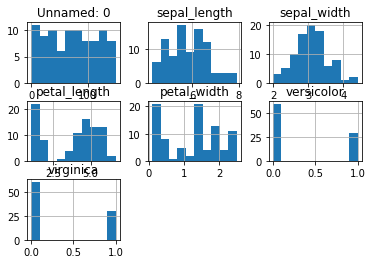

In [39]:
iris_train.hist()

<AxesSubplot:>

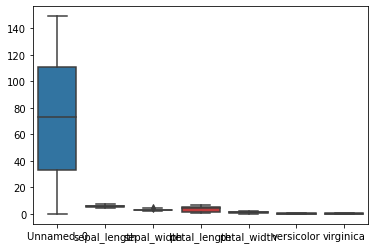

In [40]:
sns.boxplot(data=iris_train)

species
versicolor    30
setosa        30
virginica     30
Name: species, dtype: int64
versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64


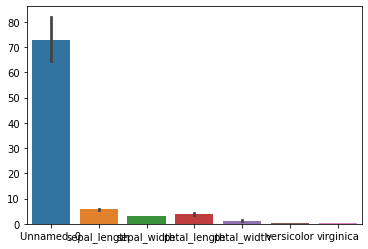

In [41]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','species','versicolor','virginica']
cat_vars=['species']
for col in cat_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.barplot(data=iris_train)
    plt.show()

###Takeaway: 
The training data set of Iris took 90 samples from the original dataset
The training data is equally spereated by species.
The sepal length has distribution of intested, we will explore more info of sepal length in order analysis whether it is the way to indicate species.

In [42]:
# problem 1-3
iris_train.groupby('species',as_index=False).agg('mean')

,species,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,21.600000,5.033333,3.466667,1.446667,0.273333,0.0,0.0
1,versicolor,73.900000,5.920000,2.726667,4.276667,1.326667,1.0,0.0
2,virginica,123.333333,6.526667,3.033333,5.510000,2.070000,0.0,1.0


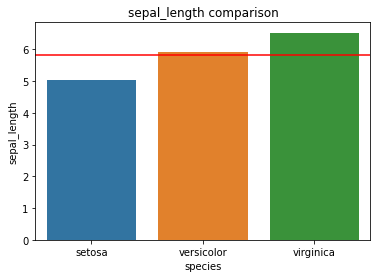

In [43]:
plt.title('sepal_length comparison')
mean=iris_train.groupby('species',as_index=False).agg('mean')
sns.barplot(x=mean.species, y=mean.sepal_length,data=iris_train)
plt.axhline(mean.sepal_length.mean(),label='average',color='red',linestyle='solid')
plt.show()

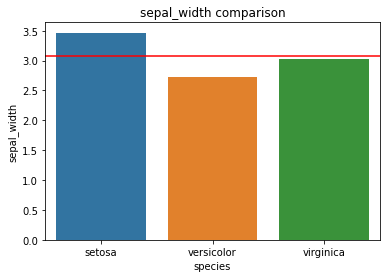

In [44]:
plt.title('sepal_width comparison')
mean=iris_train.groupby('species',as_index=False).agg('mean')
sns.barplot(x=mean.species, y=mean.sepal_width,data=iris_train)
plt.axhline(mean.sepal_width.mean(),label='average',color='red',linestyle='solid')
plt.show()

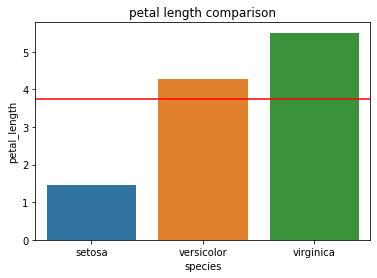

In [45]:
plt.title('petal length comparison')
mean=iris_train.groupby('species',as_index=False).agg('mean')
sns.barplot(x=mean.species, y=mean.petal_length,data=iris_train)
plt.axhline(mean.petal_length.mean(),label='average',color='red',linestyle='solid')
plt.show()

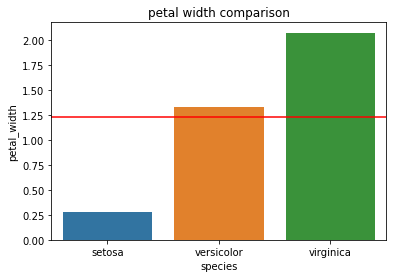

In [46]:
plt.title('petal width comparison')
mean=iris_train.groupby('species',as_index=False).agg('mean')
sns.barplot(x=mean.species, y=mean.petal_width,data=iris_train)
plt.axhline(mean.petal_width.mean(),label='average',color='red',linestyle='solid')
plt.show()

In [47]:
iris_train[iris_train.species=='versicolor'].describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,73.900000,5.920000,2.726667,4.276667,1.326667,1.0,0.0
std,13.894554,0.534596,0.310654,0.511713,0.204995,0.0,0.0
min,52.000000,4.900000,2.000000,3.000000,1.000000,1.0,0.0
25%,62.250000,5.525000,2.500000,4.000000,1.300000,1.0,0.0
50%,73.500000,6.000000,2.800000,4.350000,1.300000,1.0,0.0
75%,85.500000,6.200000,2.900000,4.675000,1.475000,1.0,0.0
max,98.000000,6.900000,3.200000,5.100000,1.800000,1.0,0.0


In [48]:
iris_train[iris_train.species=='virginica'].describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,123.333333,6.526667,3.033333,5.510000,2.070000,0.0,1.0
std,14.988118,0.666919,0.300956,0.499897,0.285452,0.0,0.0
min,100.000000,4.900000,2.500000,4.500000,1.400000,0.0,1.0
25%,111.250000,6.125000,2.800000,5.100000,1.825000,0.0,1.0
50%,123.000000,6.500000,3.000000,5.550000,2.050000,0.0,1.0
75%,134.750000,6.875000,3.200000,5.800000,2.300000,0.0,1.0
max,149.000000,7.900000,3.800000,6.700000,2.500000,0.0,1.0


In [49]:
iris_train[iris_train.species=='setosa'].describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,21.600000,5.033333,3.466667,1.446667,0.273333,0.0,0.0
std,13.563643,0.393335,0.429381,0.190703,0.122990,0.0,0.0
min,0.000000,4.300000,2.300000,1.000000,0.100000,0.0,0.0
25%,11.250000,4.800000,3.200000,1.325000,0.200000,0.0,0.0
50%,20.000000,5.000000,3.450000,1.450000,0.200000,0.0,0.0
75%,32.500000,5.350000,3.775000,1.575000,0.400000,0.0,0.0
max,44.000000,5.800000,4.400000,1.900000,0.600000,0.0,0.0


In [50]:
from scipy.stats import mannwhitneyu
setosa=iris_train[iris_train.species=='setosa']
virginica=iris_train[iris_train.species=='virginica']
versicolor=iris_train[iris_train.species=='versicolor']

In [51]:
Tst= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in Tst:
    t, p = stats.mannwhitneyu(setosa[var], virginica[var], alternative="greater")
    print(f'Comparing {var} between setosa and virginica')
    print(t, p<0.5)

Comparing sepal_length between setosa and virginica
26.0 False
Comparing sepal_width between setosa and virginica
729.5 True
Comparing petal_length between setosa and virginica
0.0 False
Comparing petal_width between setosa and virginica
0.0 False


In [52]:
Tst= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in Tst:
    t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p<0.5)

Comparing sepal_length between virginica and versicolor
691.0 True
Comparing sepal_width between virginica and versicolor
680.0 True
Comparing petal_length between virginica and versicolor
875.5 True
Comparing petal_width between virginica and versicolor
883.5 True


In [53]:
Tst= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in Tst:
    t, p = stats.mannwhitneyu(versicolor[var], setosa[var], alternative="greater")
    print(f'Comparing {var} between setosa and versicolor')
    print(t, p<0.5)

Comparing sepal_length between setosa and versicolor
816.5 True
Comparing sepal_width between setosa and versicolor
56.5 False
Comparing petal_length between setosa and versicolor
900.0 True
Comparing petal_width between setosa and versicolor
900.0 True


#### Key takeaway
there is a difference between the Virginica and setosa's sepal length,
and there are four differences between versicolor and virginica,
there are three differences between versicolor and setosa, 
there are Vorginica and Setosa will have similar features and we might see their scatter plot in near by zone.

In [54]:
# problem1-4

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

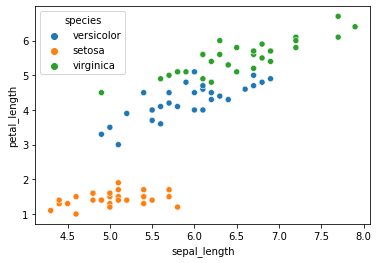

In [55]:
sns.scatterplot(x='sepal_length',y='petal_length',data=iris_train,hue='species')

In [56]:
import itertools

In [57]:
irislist_train=list(itertools.combinations(iris_train.drop(columns=['species','versicolor','virginica']).columns,2))

In [58]:
irislist_train=[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_length')]

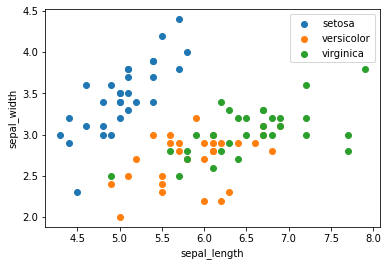

In [59]:
x = irislist_train[0][0]
y = irislist_train[0][1]
def scatter_species(x, y):
    for species, subset in iris_train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
scatter_species(x,y)

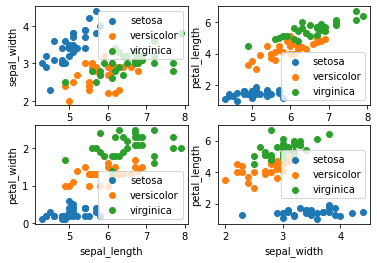

In [60]:
for i, pair in enumerate(irislist_train):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

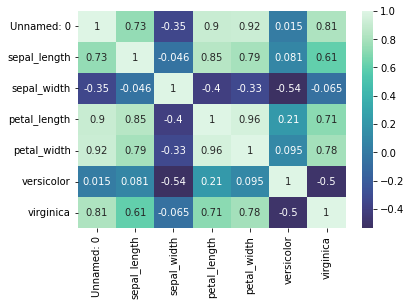

In [61]:
iris_train.corr()
sns.heatmap(iris_train.corr(), cmap='mako', center=0, annot=True)
plt.show()

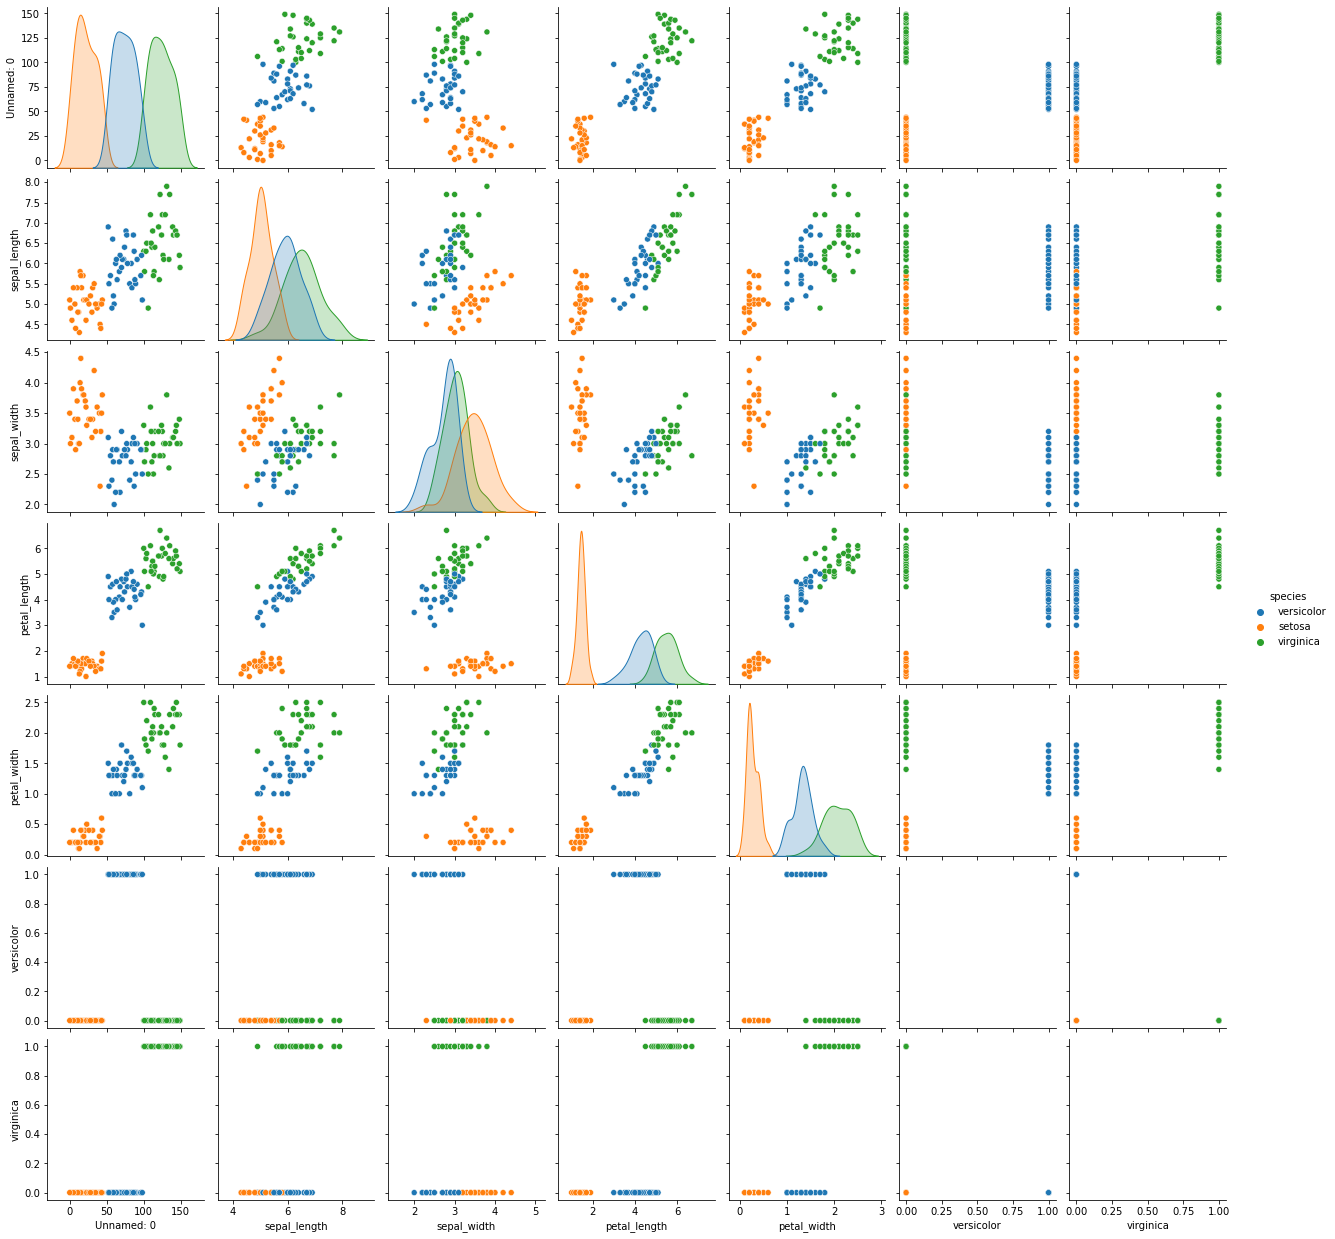

In [62]:
sns.pairplot(iris_train,hue='species')

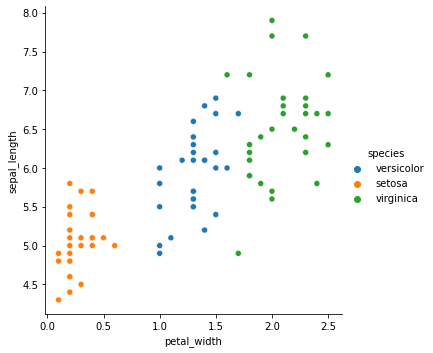

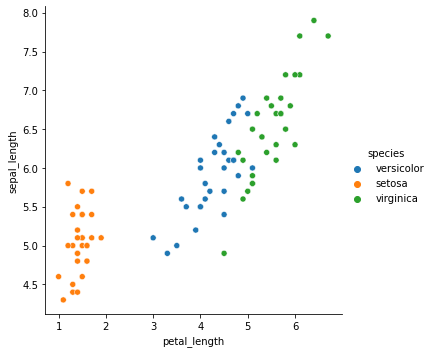

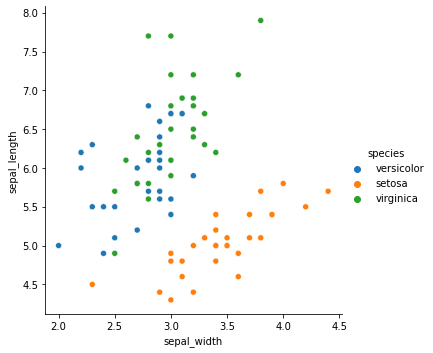

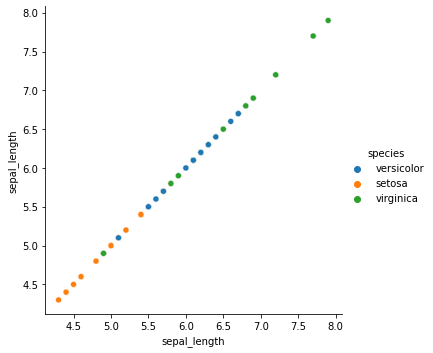

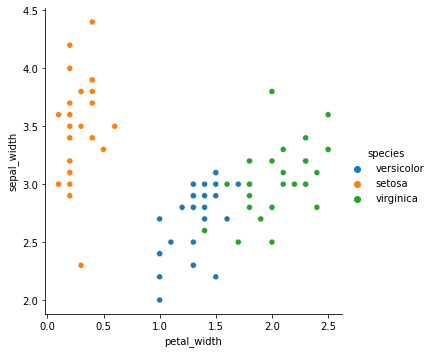

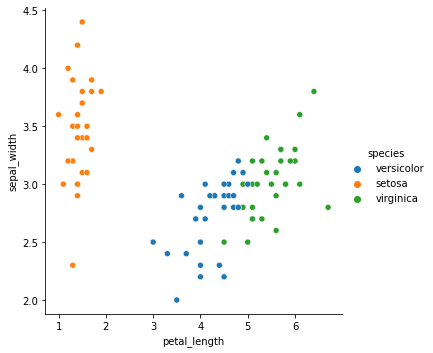

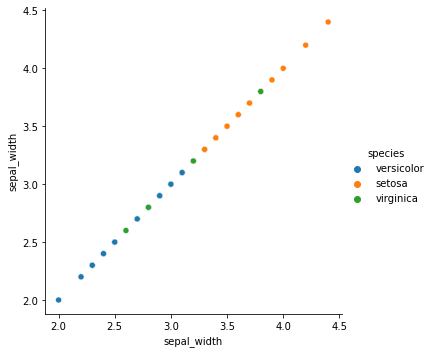

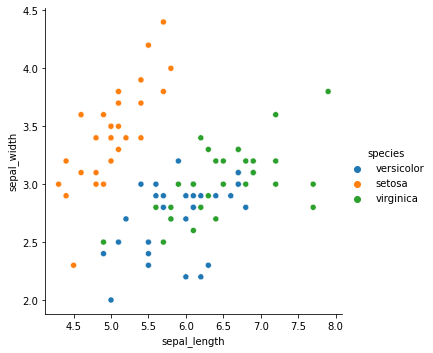

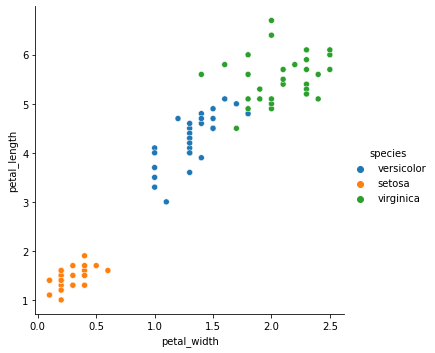

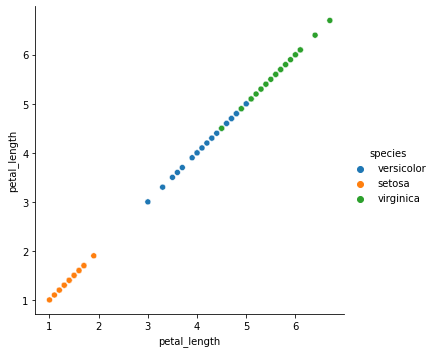

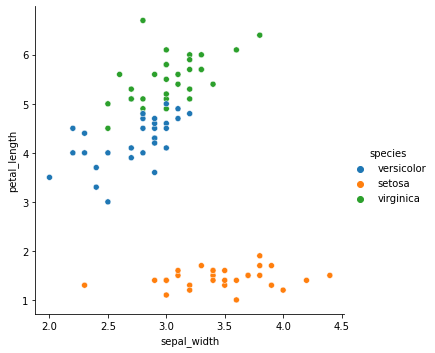

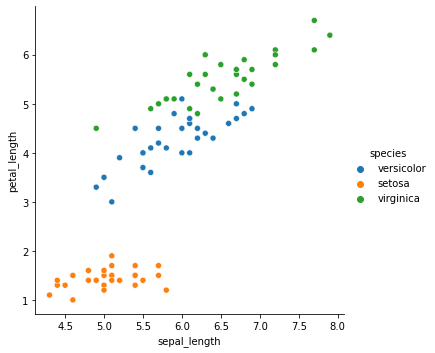

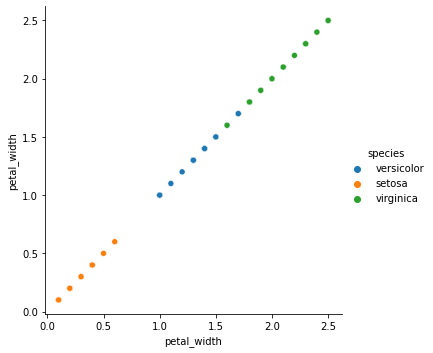

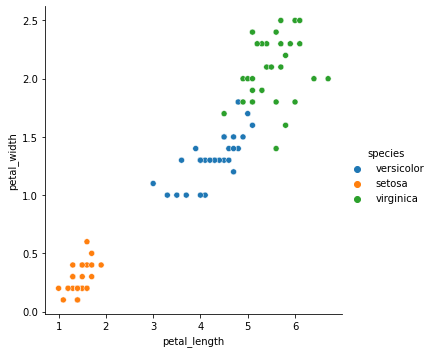

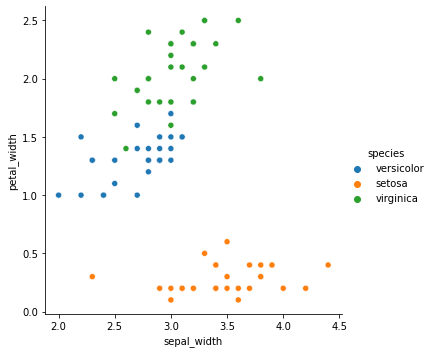

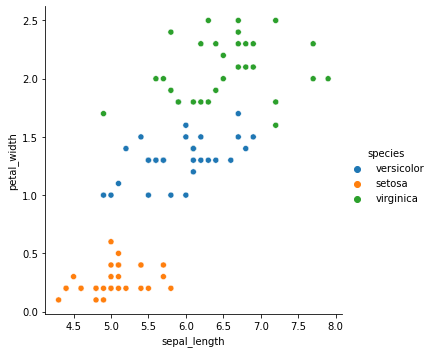

In [63]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width']
ar_vars=['petal_width','petal_length','sepal_width','sepal_length']
for col in num_vars:
    for num in ar_vars:
        sns.relplot(x=num,y=col, data=iris_train,hue='species')
        plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

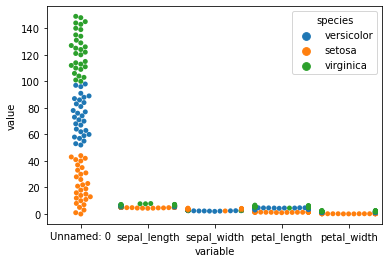

In [64]:
mel_train=iris_train.drop(columns=['versicolor','virginica']).melt(id_vars=['species'])
sns.swarmplot(x='variable',y='value',data=mel_train,hue='species')

## key takeaway
The petal length showed that each species has significant difference in petal length, while it is also holding true about the petal width. We can test the petal_width with our hypothesis to double verify the assumptions.

## Hypothesis

In [65]:
# we can use petal_width to determine the species
# H0=every species petal_width are no different
# H1=we can use petal width to determine what species they are

In [66]:
versicolor_w = iris_train[iris_train.species == 'versicolor'].sepal_width
virginica_w = iris_train[iris_train.species == 'virginica'].sepal_width
setosa_w = iris_train[iris_train.species == 'setosa'].sepal_width

<AxesSubplot:>

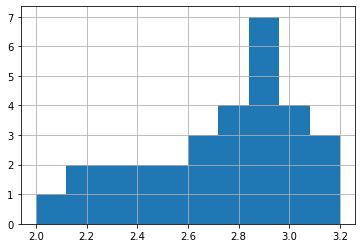

In [67]:
versicolor_w.hist()

<AxesSubplot:>

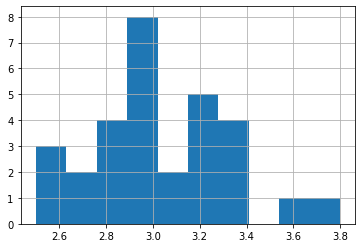

In [68]:
virginica_w.hist()

<AxesSubplot:>

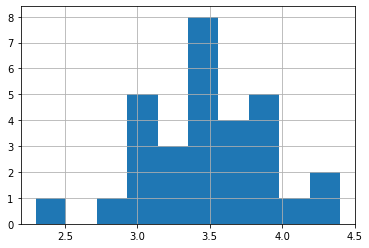

In [69]:
setosa_w.hist()

<AxesSubplot:xlabel='species', ylabel='petal_width'>

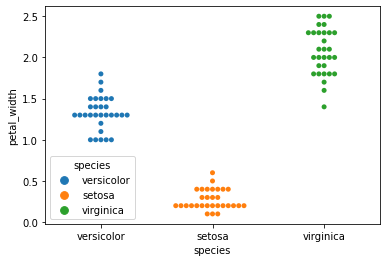

In [70]:
sns.swarmplot(x='species',y='petal_width',data=iris_train,hue='species')

In [71]:
versicolor_w.var(),virginica_w.var(),setosa_w.var()

(0.09650574712643681, 0.09057471264367817, 0.184367816091954)

In [72]:
f, p = stats.f_oneway(versicolor_w, virginica_w, setosa_w)
f, p

(33.494120559475185, 1.634476563340487e-11)

In [73]:
if p < 0.05:
    print("we can use petal width to determine what species they are")
else:
    print("every species petal_width are no different")

we can use petal width to determine what species they are


## key takeaway
we can use petal width to determine what species they are. There are significan difference between each species' petal width, that we can use the data to predict the species.

In [74]:
# problem2-1

In [75]:
ac_df_titanic=acquire.get_titanic_data()
ac_df_titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [76]:
pr_titanic=prepare.prep_titanic(ac_df_titanic)

In [77]:
titanic_train, titanic_validate, titanic_test = prepare.split_titanic(pr_titanic)

In [78]:
titanic_train

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,0,0,13.5000,Southampton,1,1,0,1
128,128,1,3,female,1,1,22.3583,Cherbourg,0,0,0,0
636,636,0,3,male,0,0,7.9250,Southampton,1,1,0,1
222,222,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [79]:
titanic_train.drop(columns=['passenger_id','sex','embark_town'],inplace=True)

In [80]:
# problem2-2

In [81]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 534 non-null    int64  
 1   pclass                   534 non-null    int64  
 2   sibsp                    534 non-null    int64  
 3   parch                    534 non-null    int64  
 4   fare                     534 non-null    float64
 5   alone                    534 non-null    int64  
 6   sex_male                 534 non-null    uint8  
 7   embark_town_Queenstown   534 non-null    uint8  
 8   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 30.8 KB


In [82]:
titanic_train.describe(include='all')

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.383895,2.323970,0.514981,0.352060,31.058106,0.627341,0.651685,0.086142,0.711610
std,0.486789,0.822928,1.143856,0.759941,46.866121,0.483966,0.476883,0.280837,0.453438
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,13.500000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,30.053100,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>,
        <AxesSubplot:title={'center':'alone'}>],
       [<AxesSubplot:title={'center':'sex_male'}>,
        <AxesSubplot:title={'center':'embark_town_Queenstown'}>,
        <AxesSubplot:title={'center':'embark_town_Southampton'}>]],
      dtype=object)

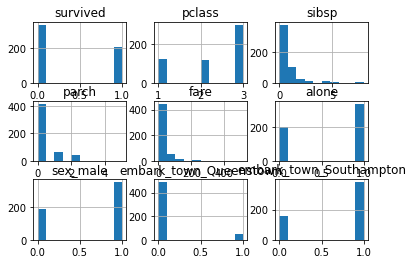

In [83]:
titanic_train.hist()

<AxesSubplot:>

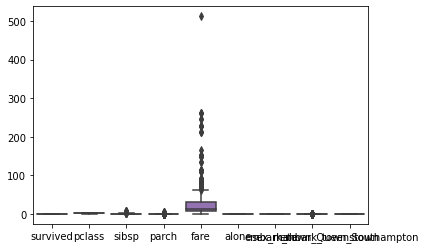

In [84]:
sns.boxplot(data=titanic_train)

pclass


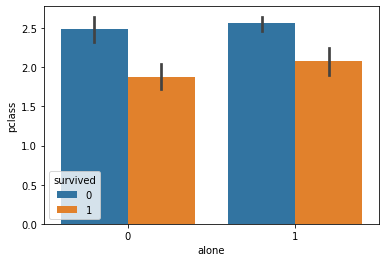

sibsp


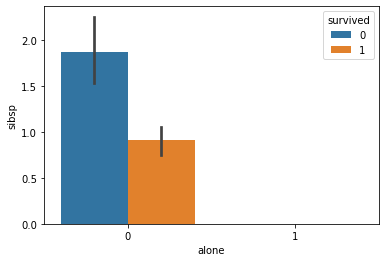

parch


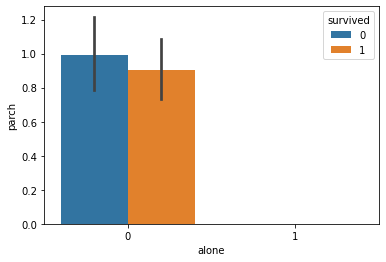

fare


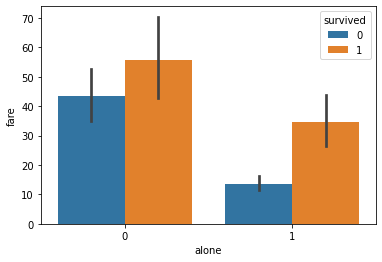

alone


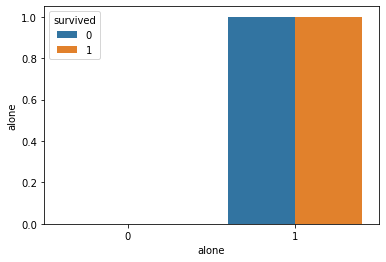

sex_male


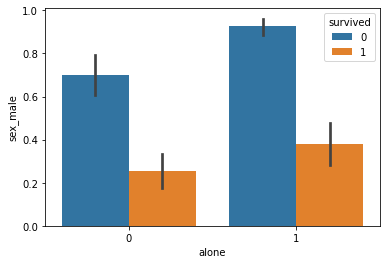

embark_town_Queenstown


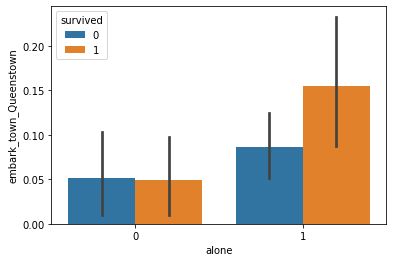

embark_town_Southampton


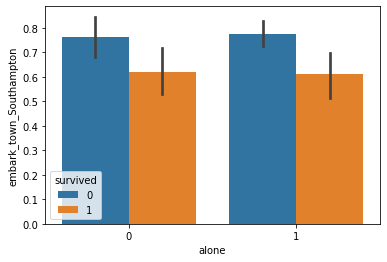

In [85]:
num_vars=['pclass','sibsp','parch','fare','alone','sex_male','embark_town_Queenstown','embark_town_Southampton']
tar_vars=['sex_male']
for col in num_vars:
    print(col)
    sns.barplot(x='alone',y=col, data=titanic_train,hue='survived')
    plt.show()

In [86]:
# problem2-3

In [88]:
titanic_train.groupby('sex_male',as_index=False).agg('sum')

,sex_male,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton
0,0,140,409,128,113,7733.6042,81,22.0,117.0
1,1,65,832,147,75,8851.4244,254,24.0,263.0


## Key takeaway
there are sigificant difference in sex_male survival and whether traveling alone, and sibsp. we should further examine those differences in following analysis

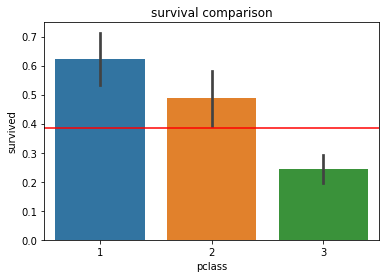

In [89]:
plt.title('survival comparison')
sns.barplot(x=titanic_train.pclass, y=titanic_train.survived,data=titanic_train)
plt.axhline(titanic_train.survived.mean(),label='average',color='red',linestyle='solid')
plt.show()

In [90]:
titanic_train[titanic_train.survived==0].describe()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,329.0,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.0,2.537994,0.553191,0.291793,22.338397,0.705167,0.860182,0.075988,0.772036
std,0.0,0.727875,1.344953,0.740772,32.917040,0.456662,0.347326,0.265382,0.420158
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,0.000000,0.000000,7.854200,0.000000,1.000000,0.000000,1.000000
50%,0.0,3.000000,0.000000,0.000000,9.500000,1.000000,1.000000,0.000000,1.000000
75%,0.0,3.000000,0.000000,0.000000,26.000000,1.000000,1.000000,0.000000,1.000000
max,0.0,3.000000,8.000000,5.000000,263.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
titanic_train[titanic_train.survived==1].describe()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,205.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.0,1.980488,0.453659,0.448780,45.052176,0.502439,0.317073,0.102439,0.614634
std,0.0,0.851533,0.709908,0.781879,60.639552,0.501218,0.466475,0.303967,0.487873
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,0.000000,11.241700,0.000000,0.000000,0.000000,0.000000
50%,1.0,2.000000,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000,1.000000
75%,1.0,3.000000,1.000000,1.000000,55.441700,1.000000,1.000000,0.000000,1.000000
max,1.0,3.000000,4.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


## key takeaway
out of 205 total survival, the data showed, around majority people who survived while traveling on first class.

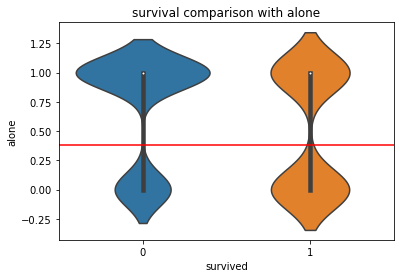

In [92]:
plt.title('survival comparison with alone')
sns.violinplot(x=titanic_train.survived, y=titanic_train.alone,data=titanic_train)
plt.axhline(titanic_train.survived.mean(),label='average',color='red',linestyle='solid')
plt.show()

## key takeaway
people who travel alone are more likely to survived.

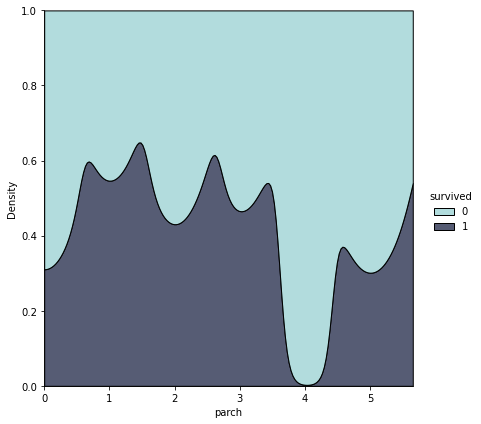

In [93]:
sns.displot(
    data=titanic_train,
    x="parch", hue="survived",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

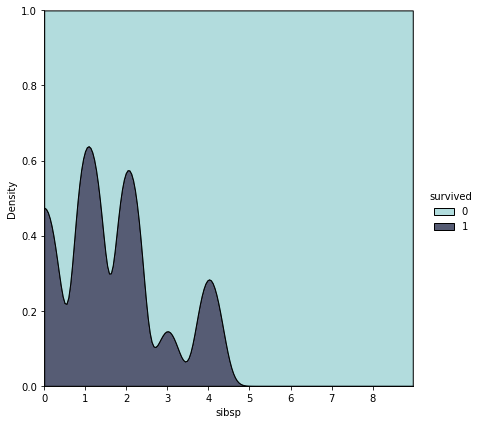

In [94]:
sns.displot(
    data=titanic_train,
    x="sibsp", hue="survived",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

## key takeaway
people who are traveling with 4 people and are parents are not likely to survived, but siblings will increace the survival rate

# part 3

In [95]:
ac_df_telco=acquire.get_telco_data()
ac_df_telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'phone_service', 'multiple_lines',
       'internet_service_type_id', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'paperless_billing', 'payment_type_id',
       'monthly_charges', 'total_charges', 'internet_service_type_id',
       'internet_service_type'],
      dtype='object')

In [96]:
pr_telco=prepare.prep_telco(ac_df_telco)

In [97]:
telco_train, telco_validate, telco_test = prepare.split_telco(pr_telco)

In [98]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender                                 4225 non-null   object 
 2   senior_citizen                         4225 non-null   int64  
 3   tenure                                 4225 non-null   int64  
 4   monthly_charges                        4225 non-null   float64
 5   total_charges                          4225 non-null   object 
 6   phone_service.1                        4225 non-null   object 
 7   multiple_lines.1                       4225 non-null   object 
 8   internet_service_type_id.1             4225 non-null   int64  
 9   online_security.1                      4225 non-null   object 
 10  online_backup.1                        4225 non-null   object 
 11  de

In [100]:
telco_train.drop(columns=['internet_service_type_id.1','payment_type_id.1','contract_type_id.1','internet_service_type_id.2'],inplace=True)

In [101]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender                                 4225 non-null   object 
 2   senior_citizen                         4225 non-null   int64  
 3   tenure                                 4225 non-null   int64  
 4   monthly_charges                        4225 non-null   float64
 5   total_charges                          4225 non-null   object 
 6   phone_service.1                        4225 non-null   object 
 7   multiple_lines.1                       4225 non-null   object 
 8   online_security.1                      4225 non-null   object 
 9   online_backup.1                        4225 non-null   object 
 10  device_protection.1                    4225 non-null   object 
 11  te

In [102]:
telco_train.describe()

,senior_citizen,tenure,monthly_charges,monthly_charges.1,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,...,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.163787,32.594793,65.421586,65.421586,0.492308,0.307456,0.907456,0.092544,0.431953,0.215385,...,0.215385,0.291834,0.215385,0.401657,0.215385,0.393136,0.600473,0.268876,0.448994,0.215385
std,0.370126,24.428740,30.186586,30.186586,0.500000,0.461494,0.289827,0.289827,0.495407,0.411138,...,0.411138,0.454660,0.411138,0.490291,0.411138,0.488504,0.489859,0.443428,0.497450,0.411138
min,0.000000,0.000000,18.400000,18.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,38.100000,38.100000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.750000,70.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.500000,90.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'senior_citizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'monthly_charges.1'}>,
        <AxesSubplot:title={'center':'partner_Yes'}>],
       [<AxesSubplot:title={'center':'dependents_Yes'}>,
        <AxesSubplot:title={'center':'phone_service_Yes'}>,
        <AxesSubplot:title={'center':'multiple_lines_No phone service'}>,
        <AxesSubplot:title={'center':'multiple_lines_Yes'}>,
        <AxesSubplot:title={'center':'online_security_No internet service'}>],
       [<AxesSubplot:title={'center':'online_security_Yes'}>,
        <AxesSubplot:title={'center':'online_backup_No internet service'}>,
        <AxesSubplot:title={'center':'online_backup_Yes'}>,
        <AxesSubplot:title={'center':'device_protection_No internet service'}>,
        <AxesSubplot:title={'center':'device_protection_Yes'}>],
       [<AxesSubplot:title={'center':'tech_supp

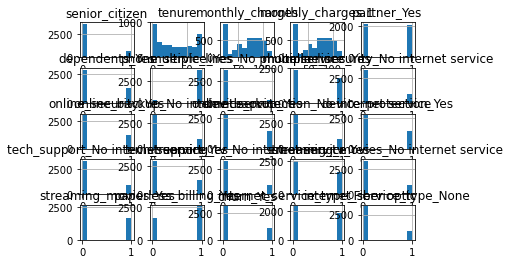

In [103]:
telco_train.hist()

In [104]:
telco_train.groupby('churn_Yes',as_index=False).agg('count')

,churn_Yes,customer_id,gender,senior_citizen,tenure,monthly_charges,total_charges,phone_service.1,multiple_lines.1,online_security.1,...,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,internet_service_type_Fiber optic,internet_service_type_None
0,0,3089,3089,3089,3089,3089,3089,3089,3089,3089,...,3089,3089,3089,3089,3089,3089,3089,3089,3089,3089
1,1,1136,1136,1136,1136,1136,1136,1136,1136,1136,...,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136


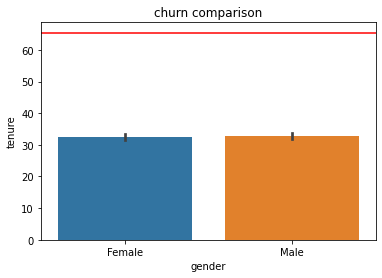

In [105]:
plt.title('churn comparison')
sns.barplot(x=telco_train.gender, y=telco_train.tenure,data=telco_train)
plt.axhline(telco_train.monthly_charges.mean(),label='average',color='red',linestyle='solid')
plt.show()

In [106]:
telco_train.groupby('gender',as_index=False).agg('count'),

(   gender  customer_id  senior_citizen  tenure  monthly_charges  \
 0  Female         2069            2069    2069             2069   
 1    Male         2156            2156    2156             2156   
 
    total_charges  phone_service.1  multiple_lines.1  online_security.1  \
 0           2069             2069              2069               2069   
 1           2156             2156              2156               2156   
 
    online_backup.1  ...  tech_support_No internet service  tech_support_Yes  \
 0             2069  ...                              2069              2069   
 1             2156  ...                              2156              2156   
 
    streaming_tv_No internet service  streaming_tv_Yes  \
 0                              2069              2069   
 1                              2156              2156   
 
    streaming_movies_No internet service  streaming_movies_Yes  \
 0                                  2069                  2069   
 1               

## key takeaway
there are equally contributed by gender

<AxesSubplot:xlabel='gender', ylabel='tenure'>

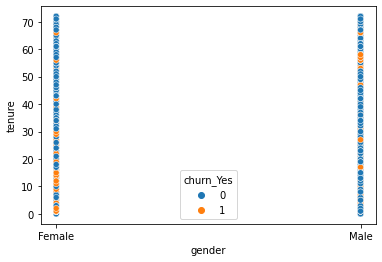

In [107]:
sns.scatterplot(x='gender',y='tenure',data=telco_train,hue='churn_Yes')

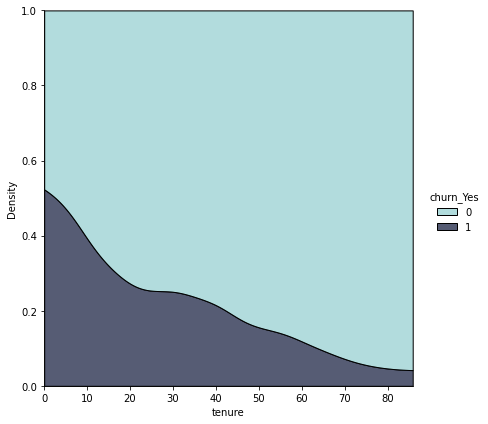

In [108]:
sns.displot(
    data=telco_train,
    x="tenure", hue="churn_Yes",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

## key takeaway
the people who has higher tenure, it is less likely to churn

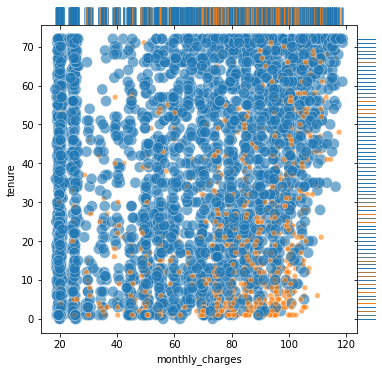

In [109]:
g=sns.JointGrid(data=telco_train, x="monthly_charges", y="tenure", space=0, ratio=17,hue='churn_Yes')
g.plot_joint(sns.scatterplot, size=telco_train["churn_Yes"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

## Key takeaway
it doesn't seems like there are likely correlation between monthly charges and tenure

In [110]:
telco_train.drop(columns=['monthly_charges.1','total_charges.1'],inplace=True)

In [111]:
telco_train.total_charges.str.replace(' ','0').astype(float)

440     3825.85
67      4059.35
600     5639.05
4883    4627.65
1258    2613.40
         ...   
1794    1559.45
817       19.65
901     5832.65
1987     572.45
6958     949.85
Name: total_charges, Length: 4225, dtype: float64

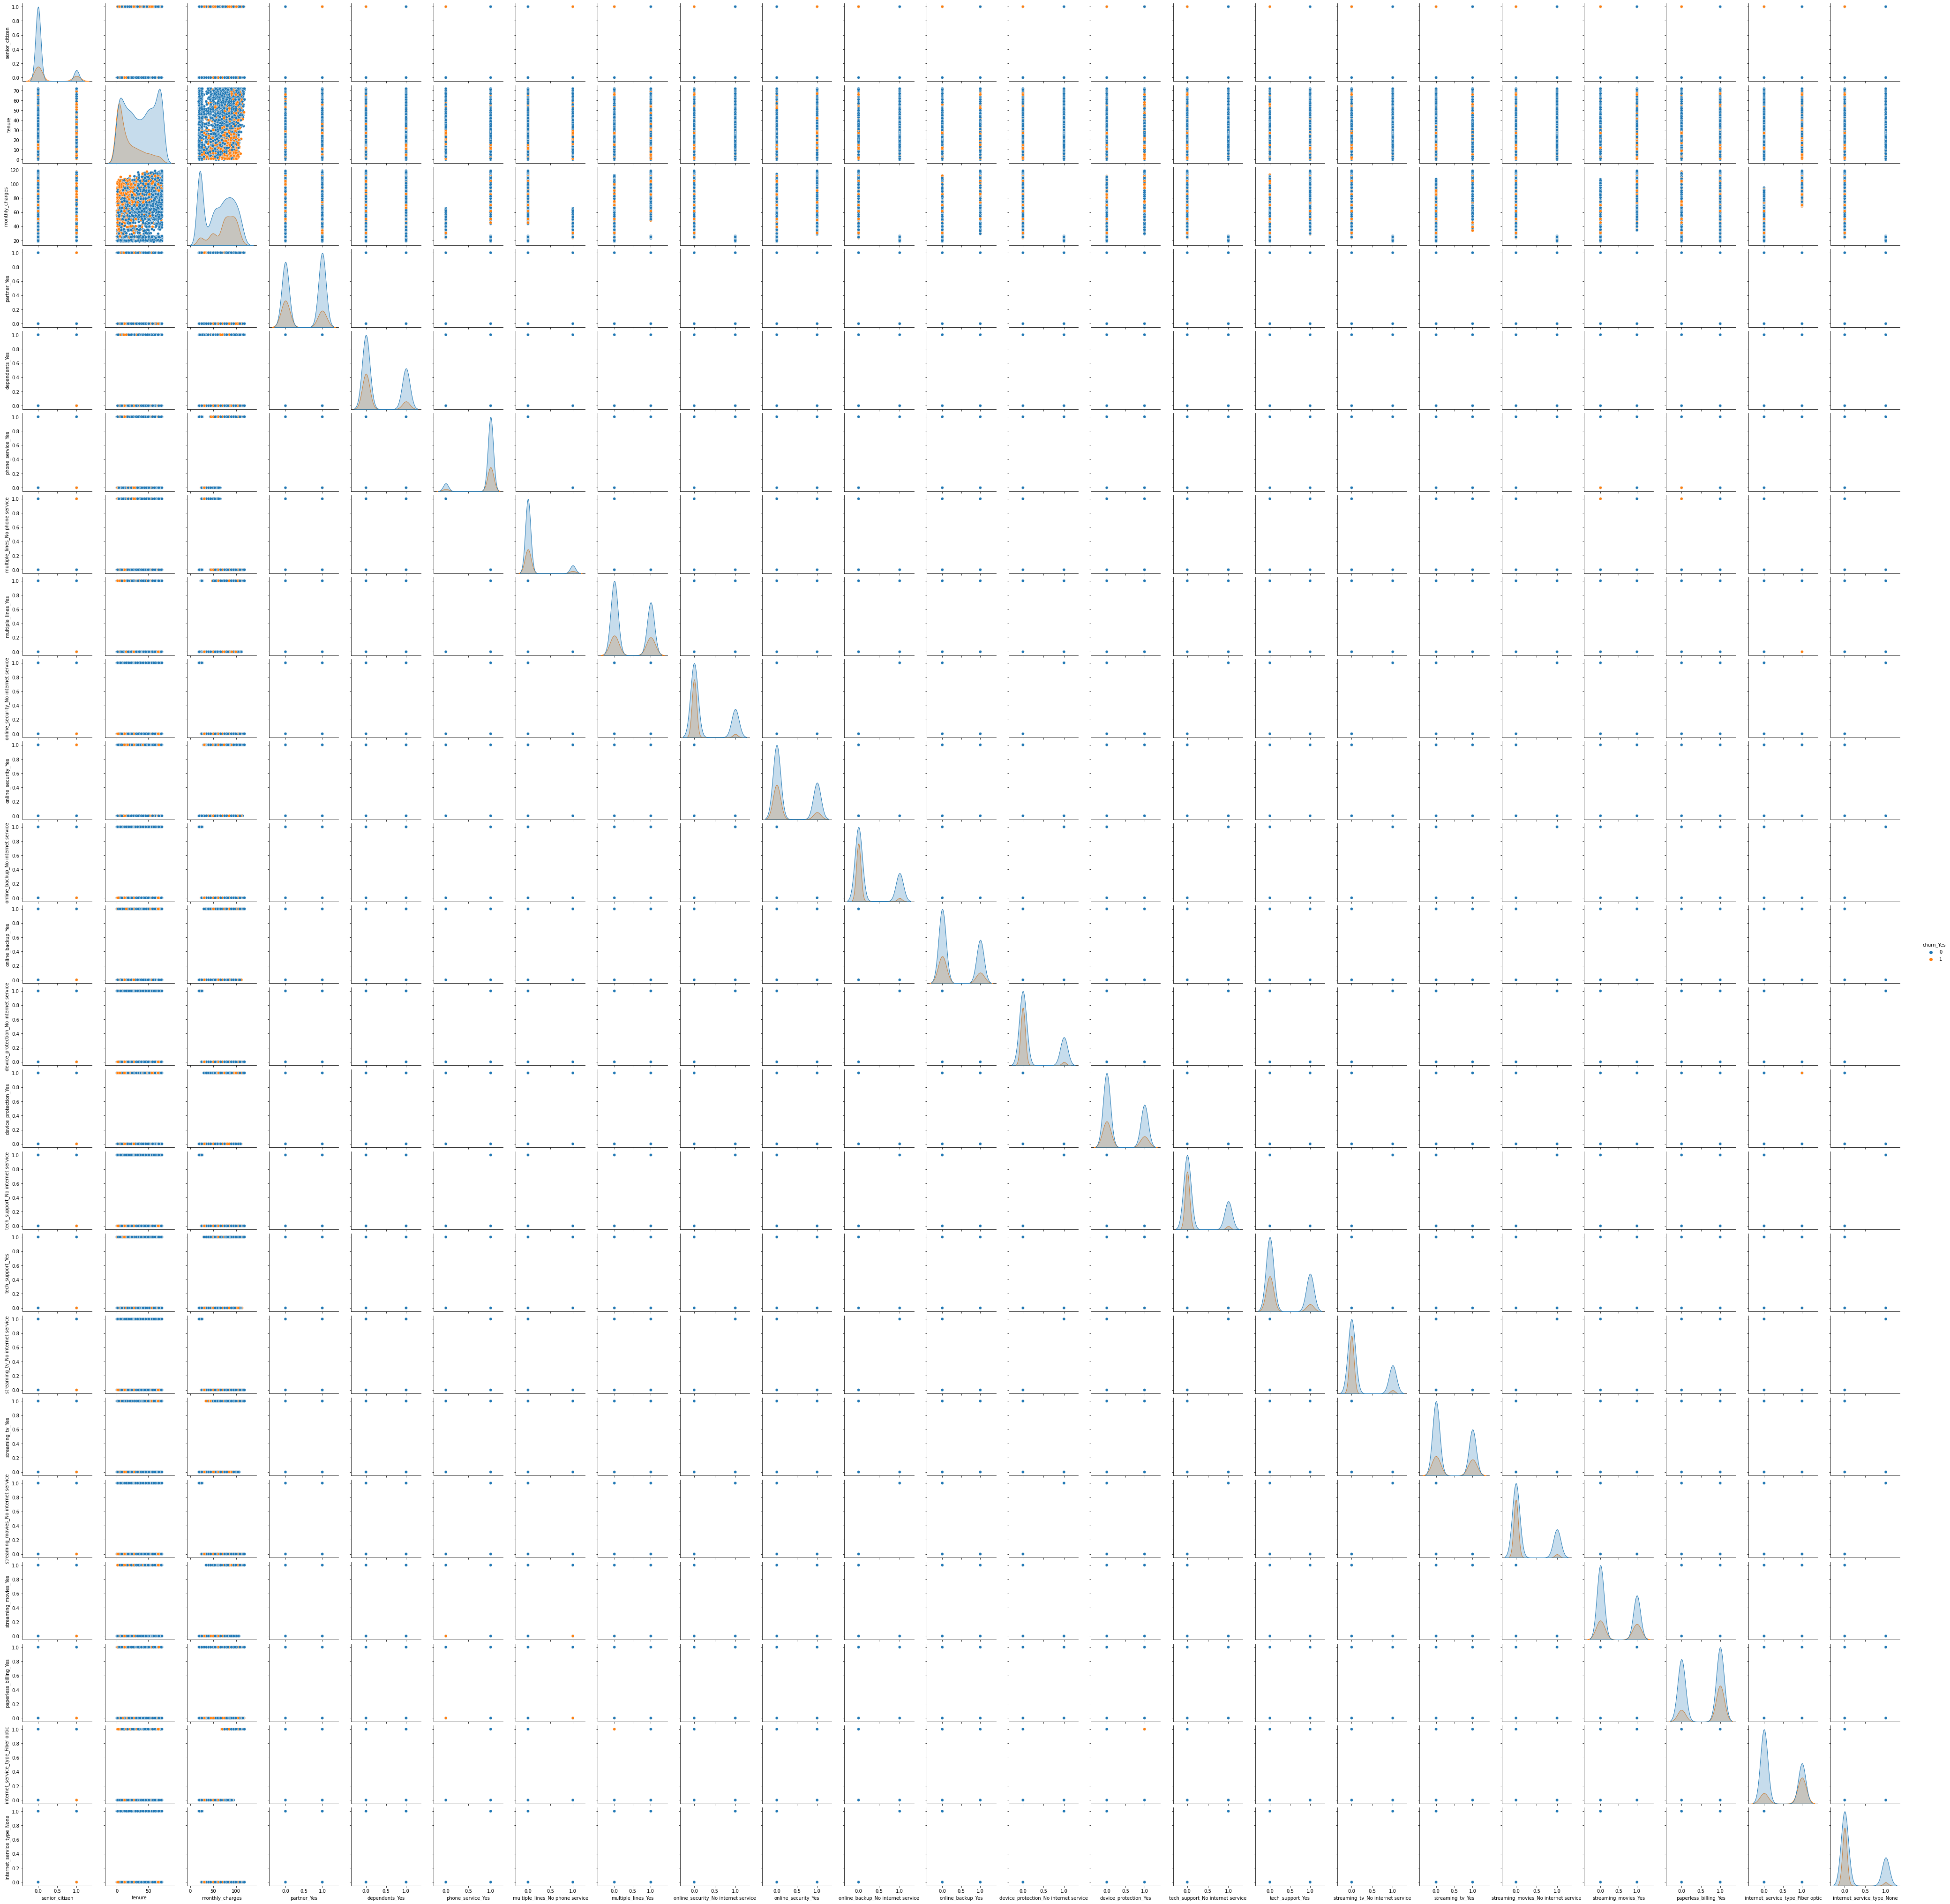

In [112]:
sns.pairplot(telco_train,hue='churn_Yes')

## key takeaway
the total charges was object, and change it to the float
seems like the tenure and related features are relating to churn rate

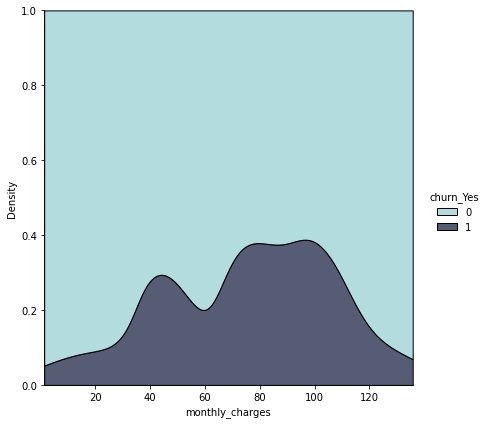

In [113]:
sns.displot(
    data=telco_train,
    x="monthly_charges", hue="churn_Yes",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

<AxesSubplot:xlabel='online_security_Yes', ylabel='churn_Yes'>

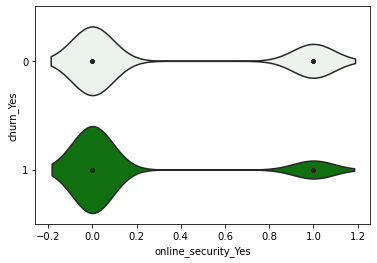

In [114]:
sns.violinplot(data=telco_train, x='online_security_Yes',y='churn_Yes',palette="light:g", inner="points", orient="h")

## key takeaway
the online security seems like has limited contribution to the churn rate, and the monthly charges has normal distributed compared to the churn rate